Haciendo un análisis de final de año en el departamento de recursos humanos, su jefe ha detectado una subida inusual de empleados que renunciaron en el último tiempo. De un total de 1470 empleados un 16% ha renunciado.

Sorprendido por este hecho le pide a usted dos tareas fundamentales:

1. Definir el target de empleado que ha renunciado. ¿Hay uno definido? O ¿Qué características comparten aquellas personas que lo han hecho?

2. Elaborar un modelo de clasificación que permita entender qué empleados pueden llegar a irse en el próximo tiempo. No hay problemas de presupuesto para realizar iniciativas de retención pero, es importante, no perder más empleados este próximo año.

---

En base a esta consigna:

1. Realice un análisis analítico y gráfico del dataset, buscando entender qué características comparten aquellos empleados que han decidido partir.

2. Haga la limpieza necesaria del dataset (incluyendo separación en train y test), utilice el modelo de regresión logística buscando maximizar la métrica que considere adecuada y devuelva la lista de empleados que tienen una mayor proabbilidad de irse este año. Muestre y expliqué qué tanta confianza presenta su modelo.

# Consigna 1 - EDA

### Realice un análisis analítico y gráfico del dataset, buscando entender qué características comparten aquellos empleados que han decidido partir.

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: https://www.kaggle.com/datasets/miraclenifise/hr-employee-attrition-datasets

In [292]:
df_employees= pd.read_csv('/Users/lolonastri/Desktop/IA_UCEMA/trabajos_practicos/tp2_employees/Employee-Attrition.csv')
df_employees

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [293]:
print("El dataset tiene" , df_employees.shape[0], "filas y", df_employees.shape[1], "columnas")

El dataset tiene 1470 filas y 35 columnas


In [294]:
df_employees['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [295]:
df_employees.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [296]:
from funciones.funciones import validate_columns
validate_columns(df_employees)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Age,NaN,1470.0,0,0.0,"[39, 25, 30, 26, 32]"
Attrition,2,1470,0,0.0,"[No, Yes, No, No, No]"
BusinessTravel,3,1470,0,0.0,"[Travel_Frequently, Travel_Rarely, Travel_Rare..."
DailyRate,NaN,1470.0,0,0.0,"[711, 240, 1092, 652, 976]"
Department,3,1470,0,0.0,"[Research & Development, Sales, Research & Dev..."
DistanceFromHome,NaN,1470.0,0,0.0,"[4, 5, 10, 7, 26]"
Education,NaN,1470.0,0,0.0,"[3, 3, 3, 3, 4]"
EducationField,6,1470,0,0.0,"[Medical, Marketing, Medical, Other, Marketing]"
EmployeeCount,NaN,1470.0,0,0.0,"[1, 1, 1, 1, 1]"
EmployeeNumber,NaN,1470.0,0,0.0,"[1633, 142, 1816, 1417, 333]"


#### Paso a dropear las siguientes columnas:
##### `EmployeeCount`: Me muestra la misma cantidad de registros que la longitud del dataset.
##### `StandardHours`: Son todos 80

In [297]:
df_employees.drop(columns=['EmployeeCount', 'StandardHours'], inplace=True)

In [298]:
#valuecounts of every column
for col in df_employees.columns:
    print(f"Value counts for {col}:")
    print(df_employees[col].value_counts())
    print("\n")




Value counts for Age:
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Value counts for DailyRate:
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources           

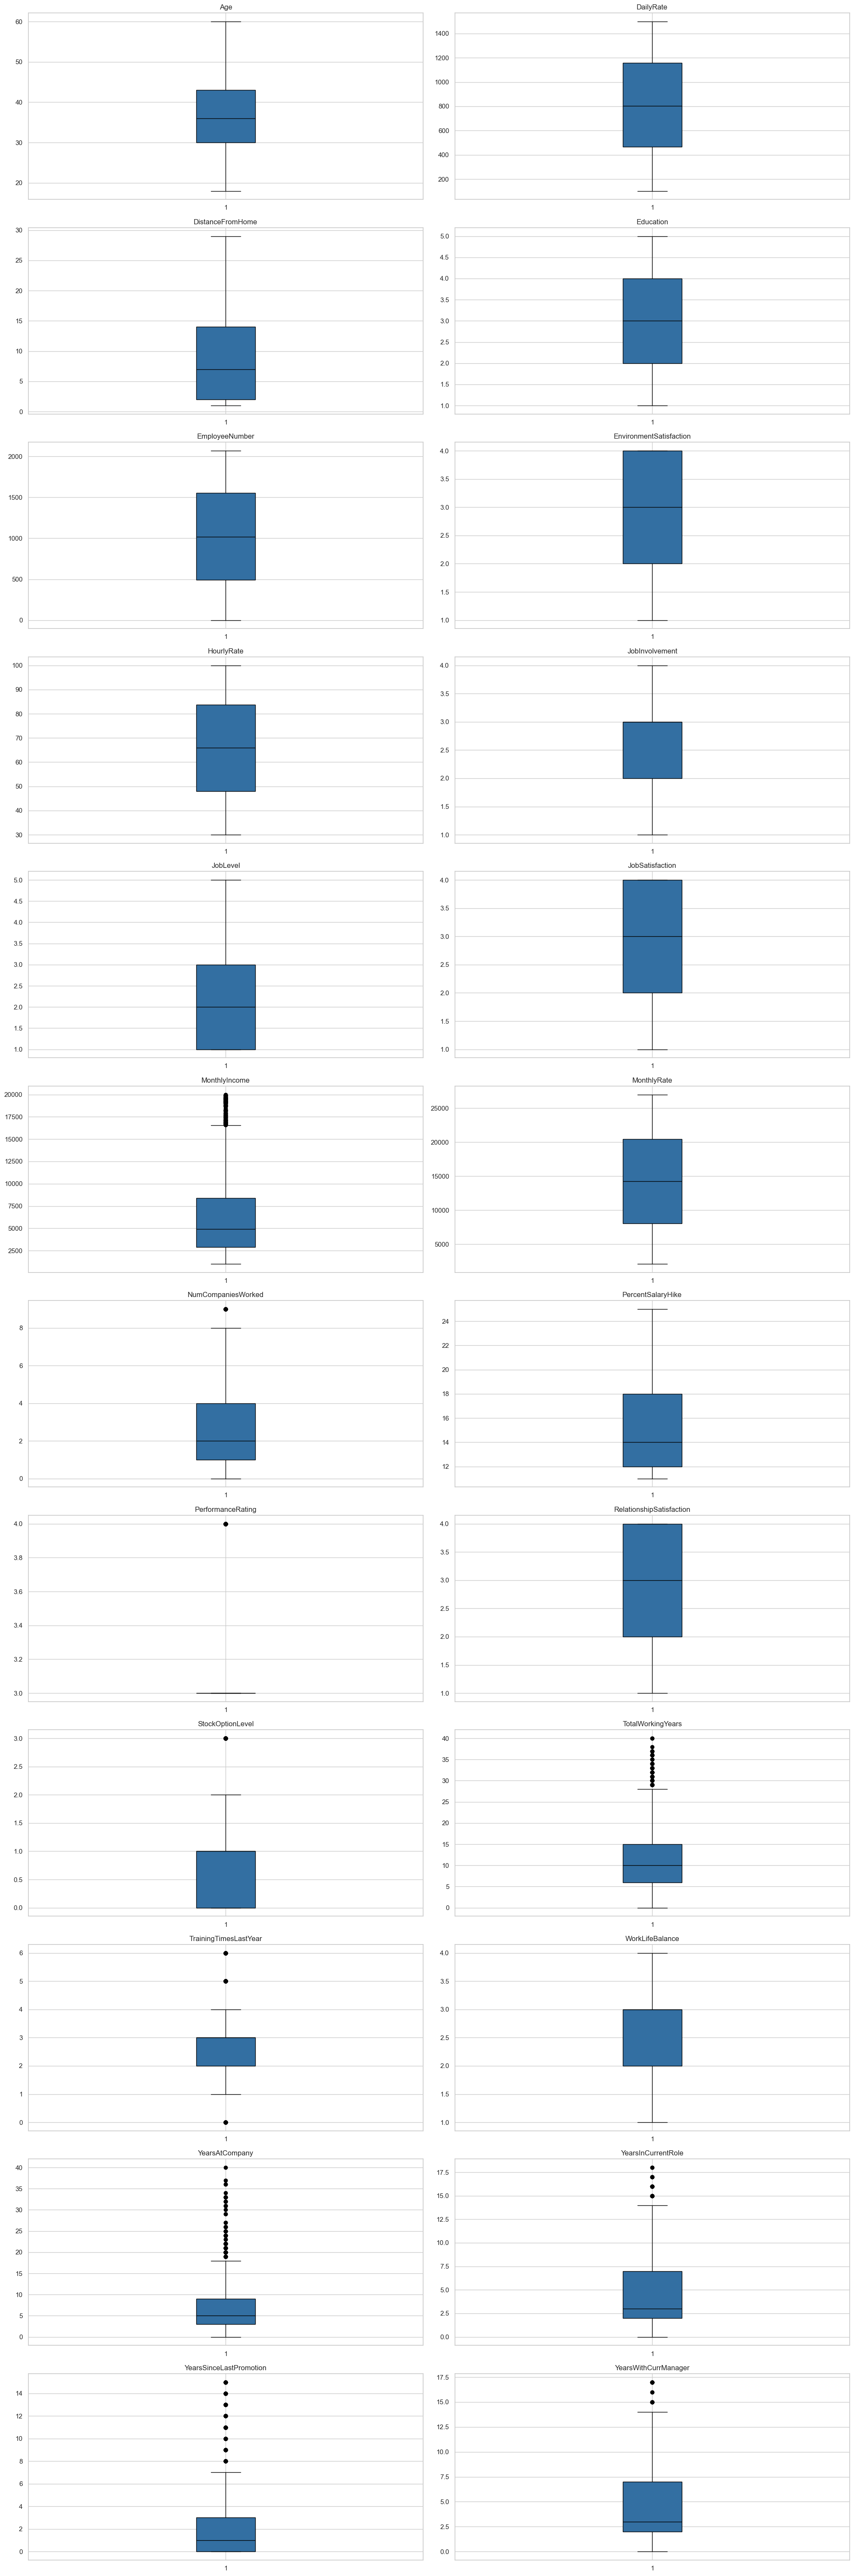

In [299]:
from funciones.funciones import plot_outliers
plot_outliers(df_employees)

In [300]:
from funciones.funciones import reconocimiento_de_outliers
outliers_monthly_income, outlier_values_monthly_income = reconocimiento_de_outliers(df_employees, "MonthlyIncome", 1.5)
outliers_years_at_company, outlier_values_years_at_company = reconocimiento_de_outliers(df_employees, "YearsAtCompany", 1.5)

Outliers de MonthlyIncome:
25      19094
29      18947
45      19545
62      18740
105     18844
        ...  
1374    17875
1377    19161
1401    19636
1437    19431
1443    18880
Name: MonthlyIncome, Length: 114, dtype: int64
Outliers de YearsAtCompany:
18      25
28      22
45      22
62      27
63      21
        ..
1403    20
1404    20
1443    22
1445    20
1462    20
Name: YearsAtCompany, Length: 104, dtype: int64


In [301]:
from funciones.funciones import remove_outliers
df_employees = remove_outliers(df_employees, "MonthlyIncome", outliers_monthly_income)
df_employees = remove_outliers(df_employees, "YearsAtCompany", outliers_years_at_company)

In [302]:
df_employees.groupby("Attrition").agg({"Age": "mean", "DistanceFromHome": "mean", "EnvironmentSatisfaction": "mean", "JobInvolvement": "mean", "JobSatisfaction": "mean", "NumCompaniesWorked": "mean", "PerformanceRating": "mean", "RelationshipSatisfaction": "mean", "TotalWorkingYears": "mean", "WorkLifeBalance": "mean",}).reset_index()

,Attrition,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,No,37.659652,8.993596,2.768527,2.778591,2.774016,2.569991,3.152790,2.728271,12.279048,2.778591
1,Yes,35.475309,10.475309,2.419753,2.524691,2.469136,3.185185,3.141975,2.629630,10.067901,2.635802


In [303]:
#from funciones.funciones import distribucion_entre_variables
#otras_variables = df_employees
#distribucion_entre_variables(df_employees, "Attrition", otras_variables)

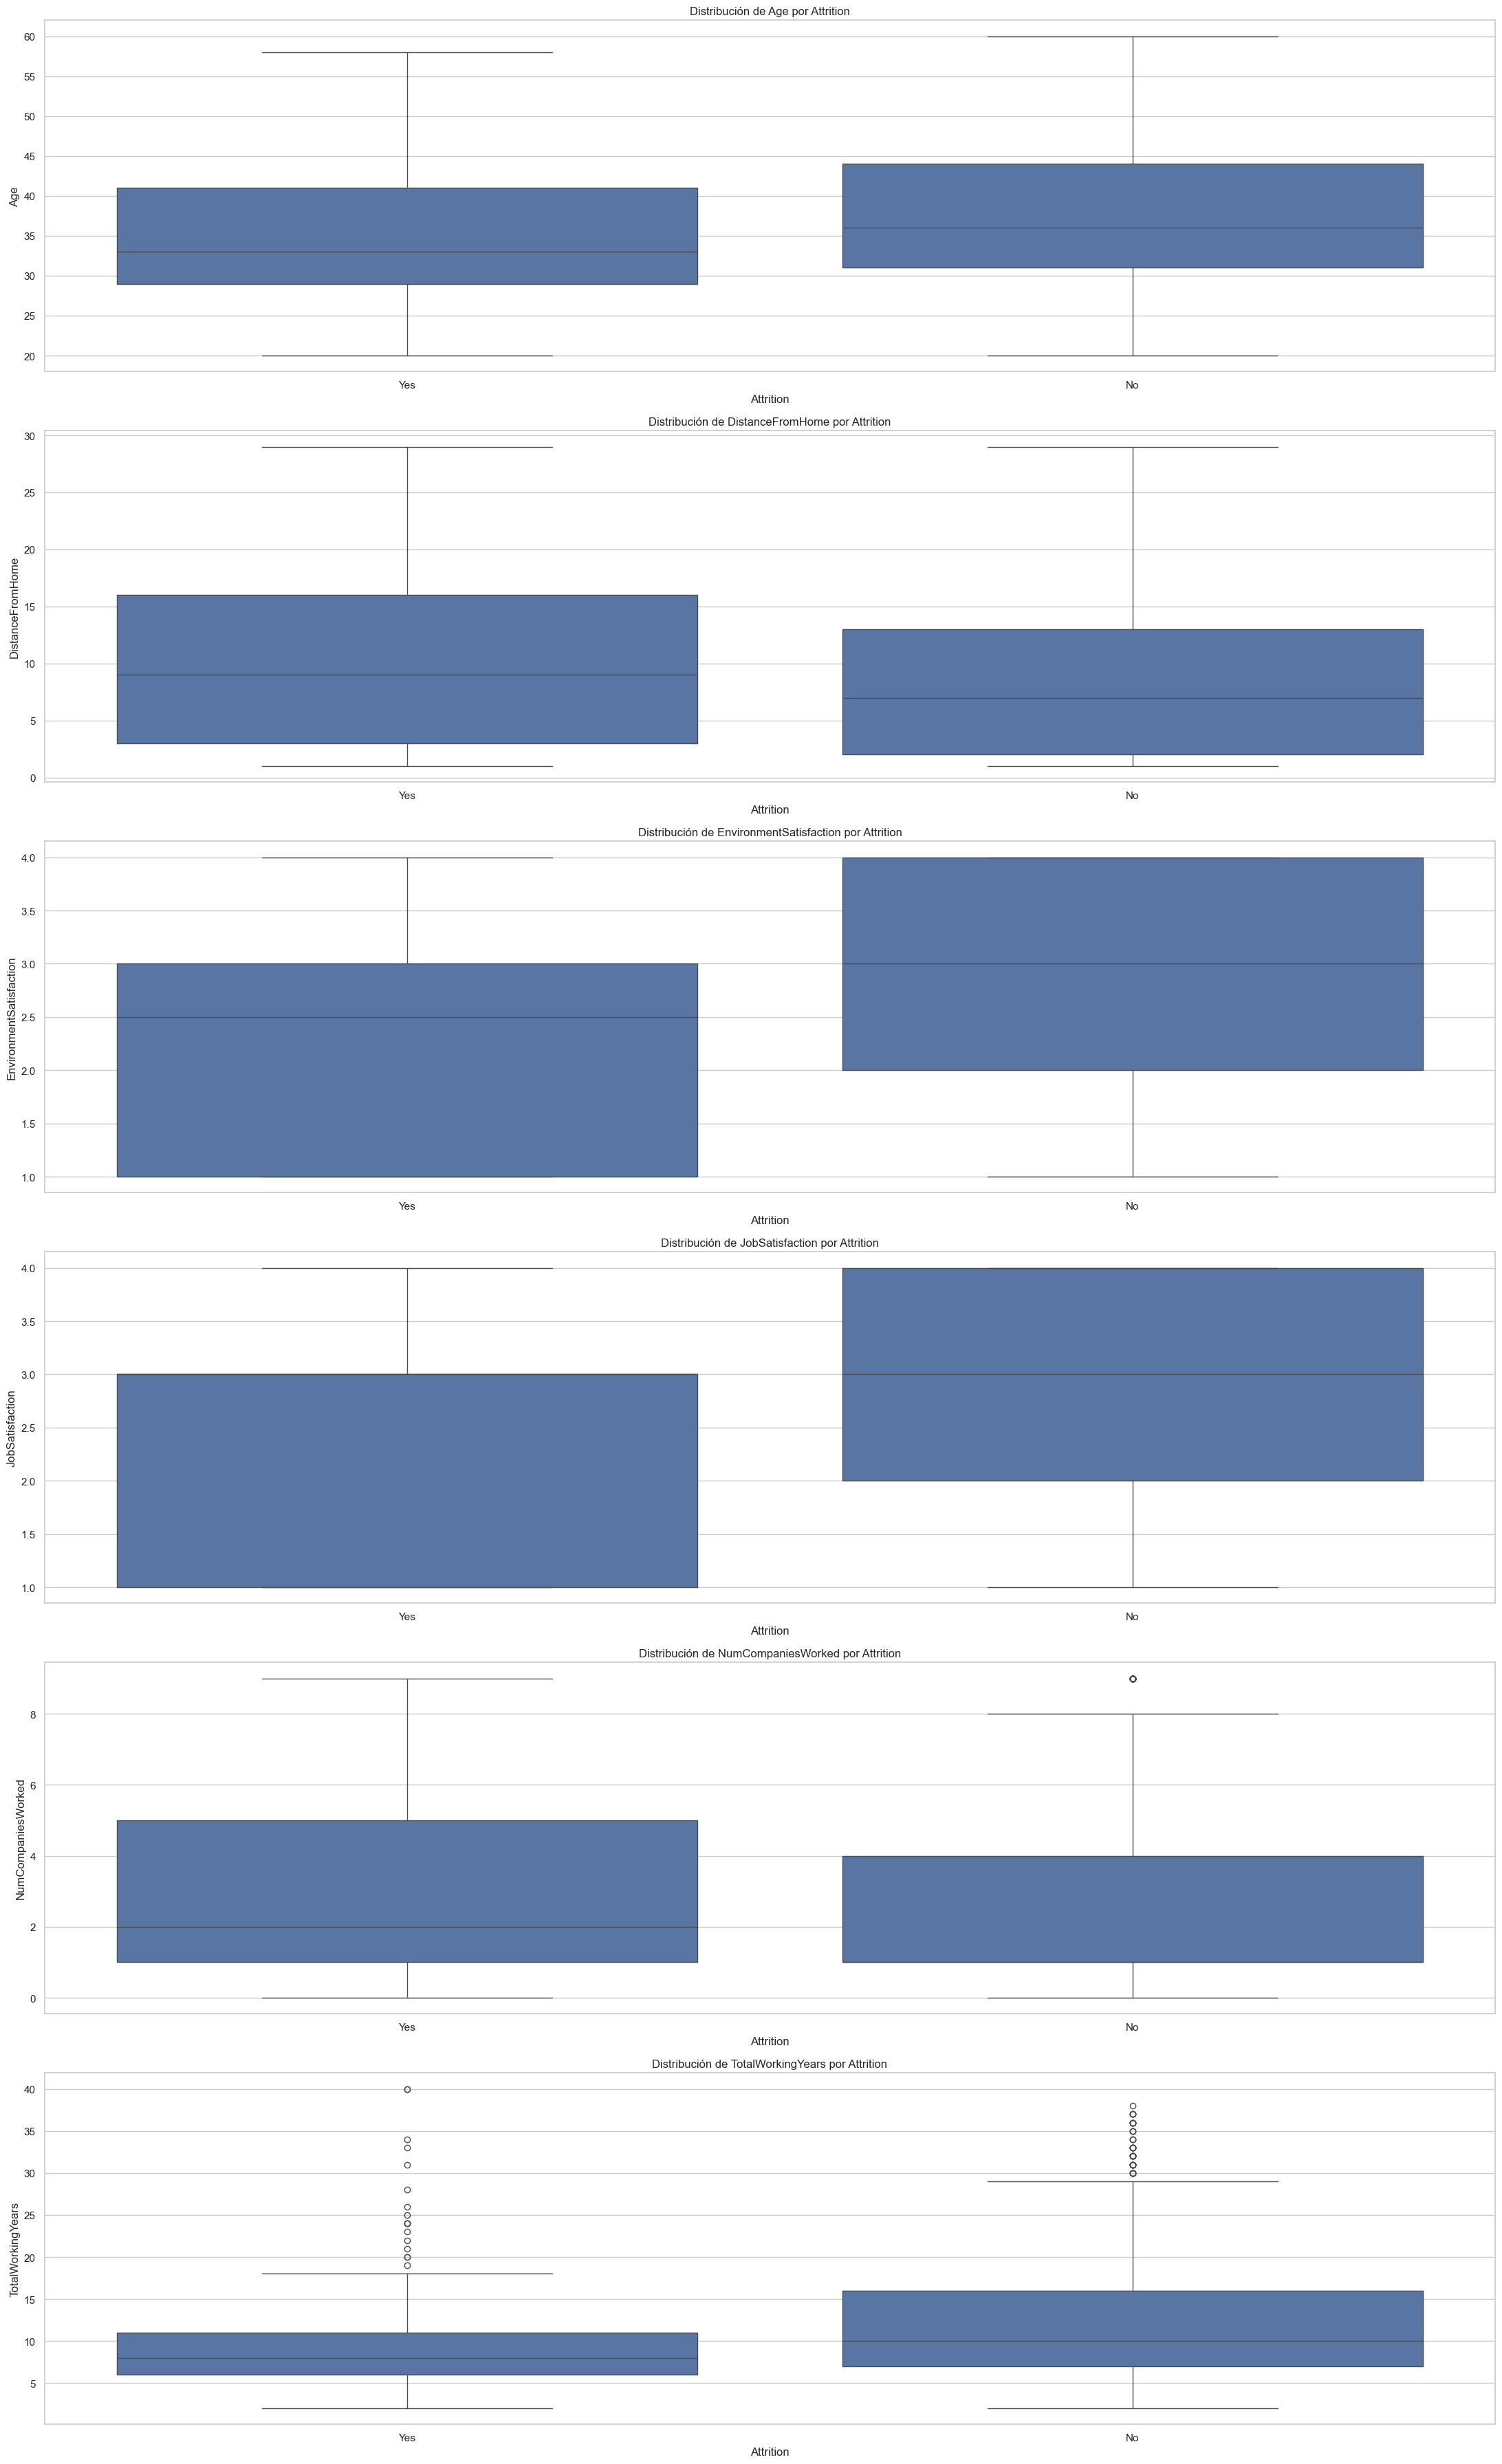

In [304]:
from funciones.funciones import distribucion_entre_variables

otras_variables = ['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobSatisfaction', 'NumCompaniesWorked', 
                   'TotalWorkingYears']

distribucion_entre_variables(df_employees, "Attrition", otras_variables)

### `Distribución general de la variable Attrition`

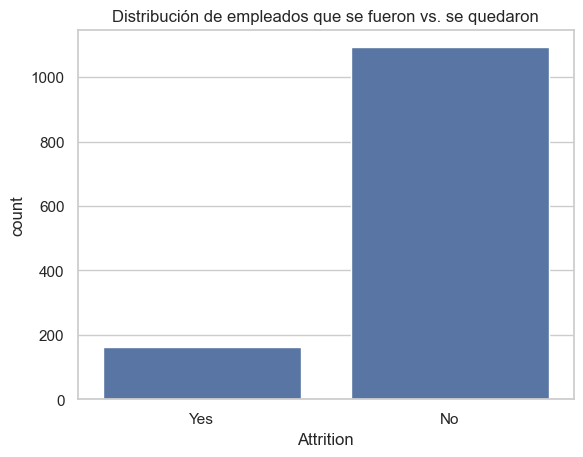

In [305]:
sns.countplot(data=df_employees, x='Attrition')
plt.title("Distribución de empleados que se fueron vs. se quedaron")
plt.show()


### `Análisis por variables numéricas (promedios según Attrition)`

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_89749/3655593969.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_employees, x='Attrition', y=col, ci=None)


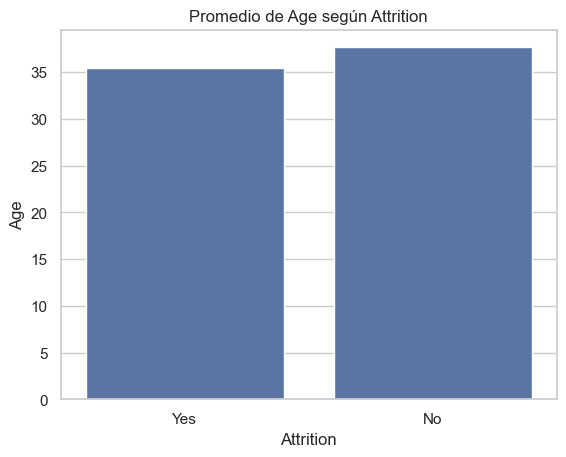

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_89749/3655593969.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_employees, x='Attrition', y=col, ci=None)


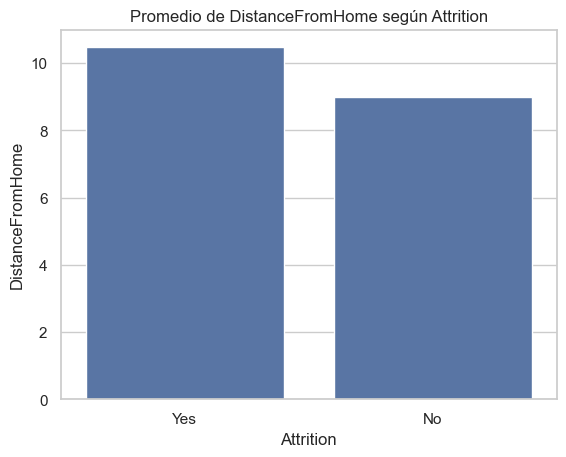

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_89749/3655593969.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_employees, x='Attrition', y=col, ci=None)


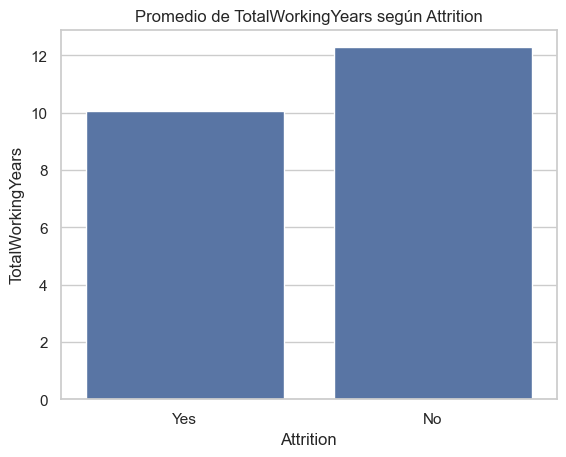

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_89749/3655593969.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_employees, x='Attrition', y=col, ci=None)


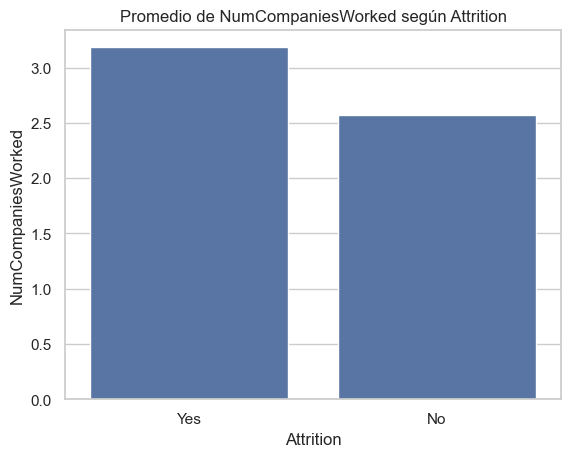

In [306]:
numericas = df_employees.select_dtypes(include=[np.number]).columns.tolist()

variables_numericas = ['Age', 'DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked']

for col in variables_numericas:
    sns.barplot(data=df_employees, x='Attrition', y=col, ci=None)
    plt.title(f'Promedio de {col} según Attrition')
    plt.show()


### `Análisis por variables categóricas (satisfacción, desempeño, balance)`

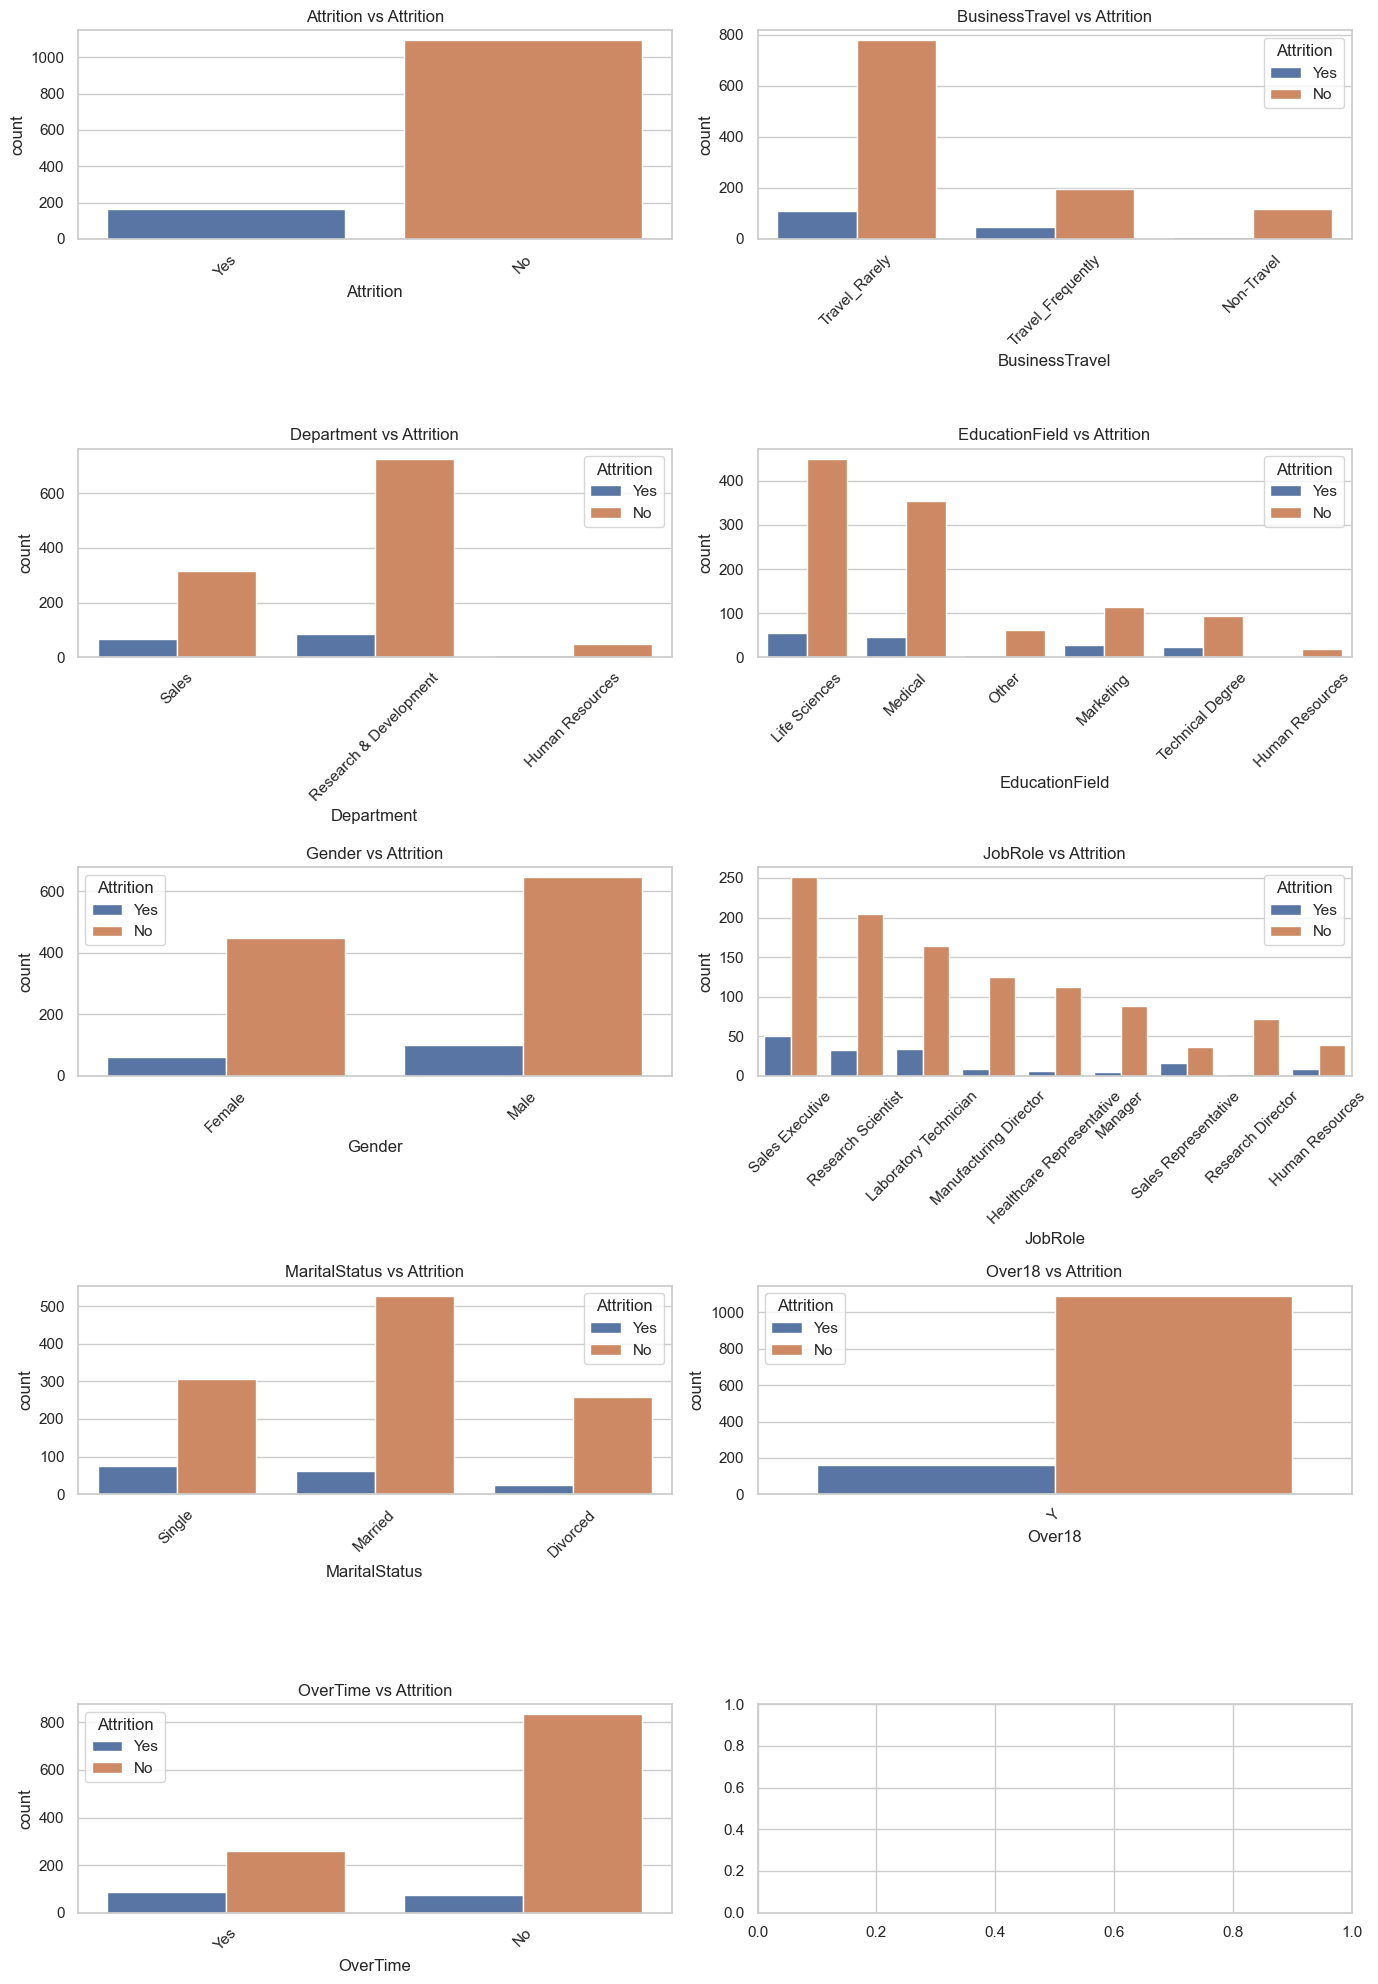

In [307]:
categoricas = df_employees.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(data=df_employees, x=col, hue='Attrition', ax=axs[i])
    axs[i].set_title(f'{col} vs Attrition')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 📌 Conclusión

Con base en el análisis realizado, los empleados que han decidido abandonar la empresa tienden a compartir ciertas características que los distinguen del resto. A continuación, se resumen las principales tendencias observadas:

| **Columna (Característica)**           | **Tendencia entre quienes se van** |
|----------------------------------------|-------------------------------------|
| 🧑‍🎓 `Age`                              | Más jóvenes                         |
| 🏠 `DistanceFromHome`                  | Mayor distancia                     |
| 📈 `TotalWorkingYears`                 | Menor experiencia                   |
| 😊 `JobSatisfaction`                   | Baja satisfacción laboral           |
| ⚖️ `WorkLifeBalance`                   | Bajo equilibrio vida-trabajo        |
| 💼 `JobInvolvement`                    | Bajo involucramiento en el trabajo  |
| 🔁 `NumCompaniesWorked`                | Mayor rotación laboral previa       |

Estas tendencias sugieren que el **compromiso, la satisfacción y la estabilidad laboral** son factores clave a considerar en estrategias de retención de talento.


---

## Consigna 2 - Clasificación

### Haga la limpieza necesaria del dataset (incluyendo separación en train y test), utilice el modelo de regresión logística buscando maximizar la métrica que considere adecuada y devuelva la lista de empleados que tienen una mayor proabbilidad de irse este año. Muestre y expliqué qué tanta confianza presenta su modelo.

In [308]:
object = df_employees.select_dtypes(exclude=[np.number])
object

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
5,No,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


##### Para hacer un heatmap solamente me va a tomar las columnas numéricas, por lo que voy a tener que convertir las categóricas a numéricas.

In [309]:
df_employees['Attrition'] = df_employees['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

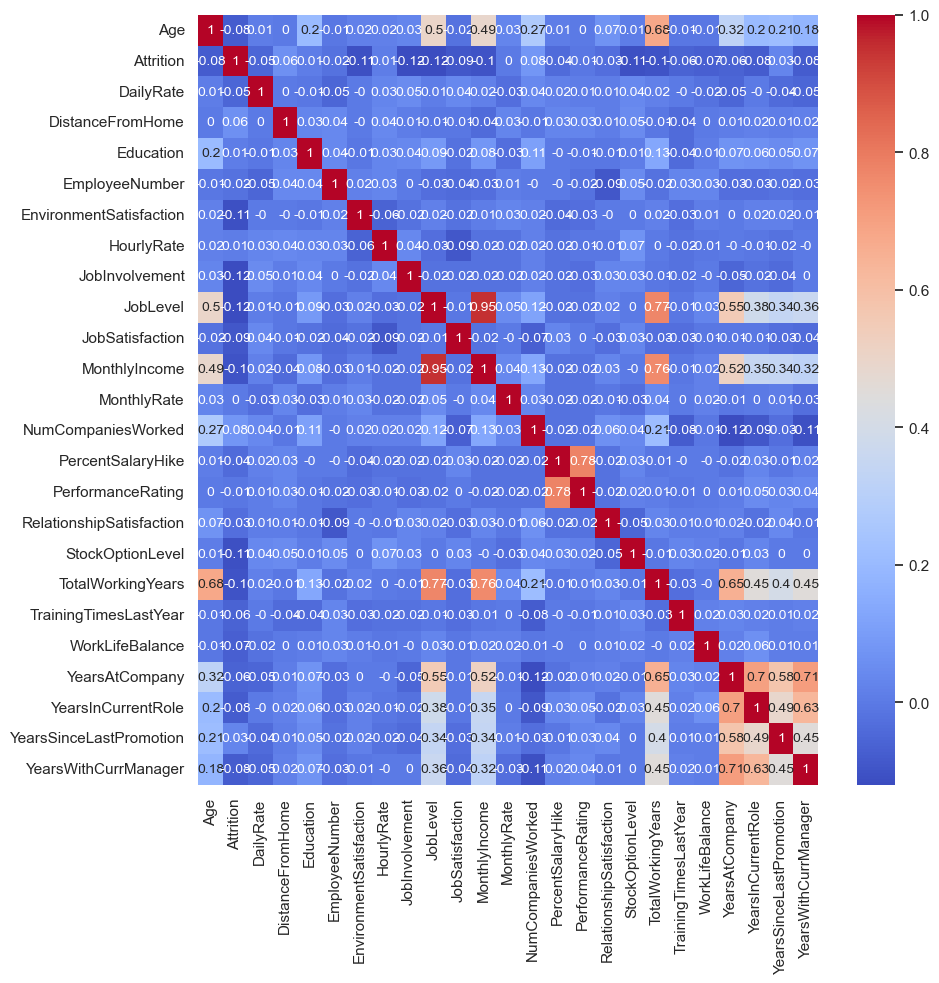

In [310]:
from funciones.funciones import crear_heatmap_correlacion
crear_heatmap_correlacion(df_employees)

In [311]:
X = df_employees[["Age", "DistanceFromHome", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "NumCompaniesWorked", "PerformanceRating", "RelationshipSatisfaction", "TotalWorkingYears", "WorkLifeBalance"]]
y = df_employees['Attrition']

In [312]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)